1. 로지스틱 회귀
 - 선형함수 ( $wx + b$ )에 시그모이드($\sigma$)를 씌운것
 - 선형함수에 의해 계산된 값을 0이나 1로 분류 되어질 확률을 구할 수 있다.

2. LinearSVC
 - SVN을 기반으로 각 특성의 차원을 늘려서 수학적인 기교를 통해 분류하는 방식

In [1]:
!pip install mglearn

     |████████████████████████████████| 542kB 3.3MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=03c32545cbbd457b346978d14475f724fe8dfa8ff651866f305eed629750f837
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [2]:
import mglearn

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


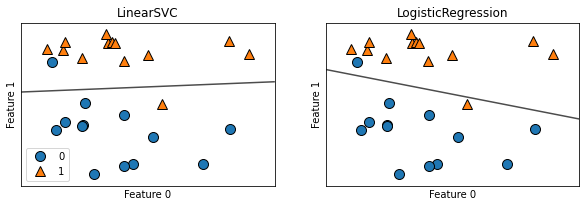

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    
axes[0].legend()

plt.show()

규제를 조절하는 c를 사용해서 가중치를 조절한다.

모델의 규제의 강도를 줄이거나 늘릴 수 있다.
* c가 높아지면 규제가 감소해서 가중치가 증가한다. ( 복잡도 증가 )
* c가 낮아지면 규제가 증가해서 가중치가 감소한다. ( 복잡도 감소 )

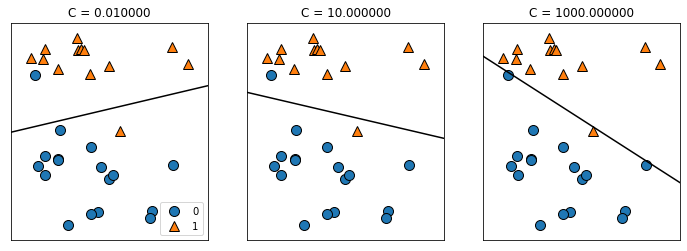

In [8]:
mglearn.plots.plot_linear_svc_regularization()

유방암 데이터셋 분류하기

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify=cancer.target, # 계층 분할 대상
                                                    random_state=42)

log_reg = LogisticRegression(max_iter=10000).fit(x_train, y_train)
print("훈련 세트 점수: {}".format(log_reg.score(x_train, y_train)))
print("테스트 세트 점수: {}".format(log_reg.score(x_test, y_test)))

훈련 세트 점수: 0.9577464788732394
테스트 세트 점수: 0.958041958041958


In [13]:
log_reg100 = LogisticRegression(C=100, max_iter=10000).fit(x_train, y_train)
print("훈련 세트 점수: {}".format(log_reg100.score(x_train, y_train)))
print("테스트 세트 점수: {}".format(log_reg100.score(x_test, y_test)))

훈련 세트 점수: 0.9812206572769953
테스트 세트 점수: 0.965034965034965


In [16]:
log_reg001 = LogisticRegression(C=0.01, max_iter=10000).fit(x_train, y_train)
print("훈련 세트 점수: {}".format(log_reg001.score(x_train, y_train)))
print("테스트 세트 점수: {}".format(log_reg001.score(x_test, y_test)))

훈련 세트 점수: 0.9530516431924883
테스트 세트 점수: 0.951048951048951


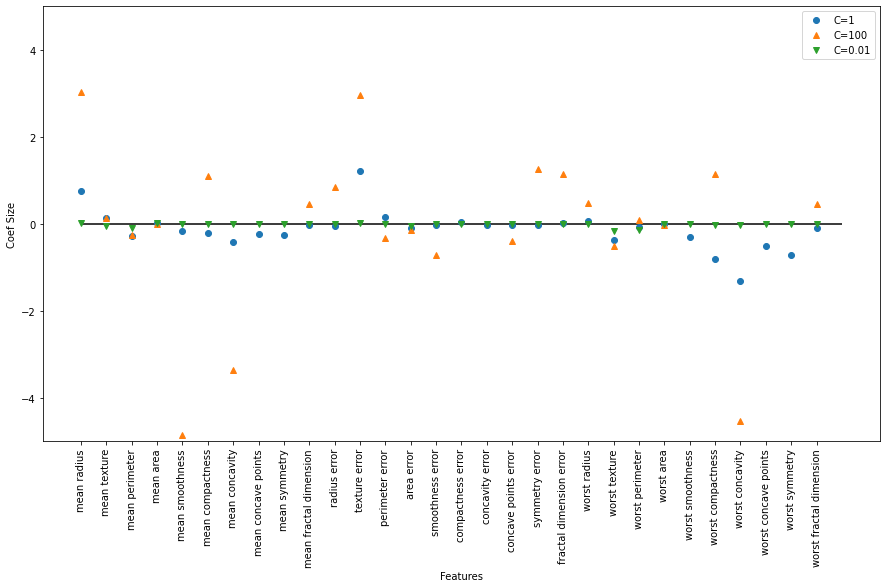

In [18]:
plt.figure(figsize=(15, 8))

plt.plot(log_reg.coef_.T, 'o', label="C=1")
plt.plot(log_reg100.coef_.T, '^', label="C=100")
plt.plot(log_reg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Features")
plt.ylabel("Coef Size")
plt.legend()